K-최근접이웃(KNN) : 와인 등급 예측

목표: 와인 정보 데이터셋을 이용하여 와인의 등급 예측

via 최효원's Jupyter Notebook

총 세가지 등급으로 이루어진 와인의 정보를 담은 데이터셋입니다(알코올, 말산, 마그네슘 수치 등).

outlier 가 적은 데이터에 적합하고, 다중 분류 예측에 가장 간편히 활용할 수 있고, baseline 모델로 사용되는
KNN 알고리즘을 데이터셋에 적용 후, 와인 등급을 예측하기 위한 작업을 진행했습니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#라이브러리 import

df = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv')
#데이터 출처 : https://media.githubusercontent.com/media/musthave-ML10
df.head()
#알코올(도수) #말산 #증발/소각 후 남은 무기물 #마그네슘 #전체 페놀 #플라보노이드(색소)
#비색소 페놀 #프로안토시아닌 #색상 강도 #색조 #희석된 와인 담백질 함량 #프롤린 #와인 등급(target 변수)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
df.info()
#total 178 rows / 14 cols
#알코올(도수), 비색소 페놀 변수에서 각각 2개, 5개의 결측치가 확인됐습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [4]:
df.describe().T
#데이터 통계 정보
#거리 기반 알고리즘인 KNN 적용에 변수 값의 범위(scale) 차이는 치명적임,
#scaling 작업이 필요할 것으로 예상됩니다.
#color intensity 변수에서 비교적 고르게 값이 증가하다가 최댓값에서 값이 2배로 뜀
#(outlier 가능성)

,count,mean,std,min,25%,50%,75%,max
alcohol,176.0,12.989091,0.804431,11.03,12.3550,13.050,13.6725,14.75
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,173.0,0.362370,0.126153,0.13,0.2600,0.340,0.4500,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
df['class'].unique()
#타겟 변수의 고윳값 확인

array([0, 1, 2])

In [8]:
df['class'].nunique()

3

In [9]:
df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

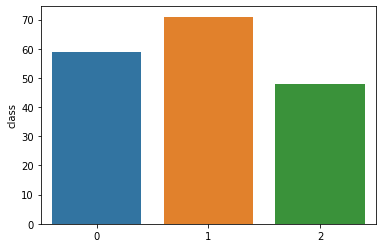

In [11]:
sns.barplot(x = df['class'].value_counts().index, y = df['class'].value_counts())
#타겟 변수에 대한 막대 그래프 생성 및 출력(barplot 활용)
plt.show()

/Users/hyosasiburi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


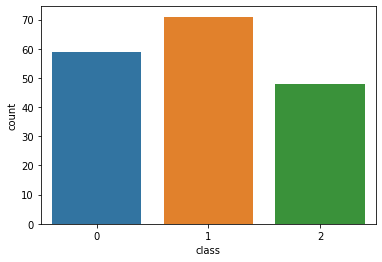

In [13]:
sns.countplot(df['class'])
#countplot 활용
plt.show()

In [14]:
df.isna()
#결측치 - True 로 출력

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.sum()
#컬럼별 수치 합게

alcohol                           2286.080000
malic_acid                         415.870000
ash                                421.240000
alcalinity_of_ash                 3470.100000
magnesium                        17754.000000
total_phenols                      408.530000
flavanoids                         361.210000
nonflavanoid_phenols                62.690000
proanthocyanins                    283.180000
color_intensity                    900.339999
hue                                170.426000
od280/od315_of_diluted_wines       464.880000
proline                         132947.000000
class                              167.000000
dtype: float64

In [16]:
df.isna().sum()
#컬럼별 결측치 개수 합

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [18]:
df.mean()
#컬럼별 평균값

alcohol                          12.989091
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.362370
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
class                             0.938202
dtype: float64

In [20]:
df.isna().mean()
#결측치 비율 확인

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [22]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [30]:
df.fillna(df.median(), inplace = True)
#outlier 에 조금 덜 민감한 중윗값(median 값으로 대체)

In [31]:
df.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#스케일러 import
#standard - 평균/ 표준편차 이용
#MinMax - 최대/ 최소 이용
#Robust - 사분위값 이용

std = StandardScaler()

In [33]:
std_df = std.fit_transform(df)
std_df

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [34]:
pd.DataFrame(std_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [35]:
std_df = pd.DataFrame(std_df, columns = df.columns)

In [36]:
std_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [39]:
round(std_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,-0.0,1.0,-2.46,-0.79,0.08,0.84,2.21
malic_acid,178.0,-0.0,1.0,-1.43,-0.66,-0.42,0.67,3.11
ash,178.0,-0.0,1.0,-3.68,-0.57,-0.02,0.70,3.16
alcalinity_of_ash,178.0,-0.0,1.0,-2.67,-0.69,0.00,0.60,3.15
magnesium,178.0,-0.0,1.0,-2.09,-0.82,-0.12,0.51,4.37
total_phenols,178.0,-0.0,1.0,-2.11,-0.89,0.10,0.81,2.54
flavanoids,178.0,-0.0,1.0,-1.70,-0.83,0.11,0.85,3.06
nonflavanoid_phenols,178.0,-0.0,1.0,-1.87,-0.74,-0.18,0.61,2.40
proanthocyanins,178.0,-0.0,1.0,-2.07,-0.60,-0.06,0.63,3.49
color_intensity,178.0,-0.0,1.0,-1.63,-0.80,-0.16,0.49,3.44


In [40]:
rb = RobustScaler()
rb_scaled = rb.fit_transform(df)
rb_scaled = pd.DataFrame(rb_scaled, columns = df.columns)
rb_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0.907692,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050,-0.5
1,0.000000,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090,-0.5
2,0.084615,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728,-0.5
3,1.015385,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603,-0.5
4,0.146154,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.507692,2.557432,0.258993,0.232558,-0.157895,-0.638298,-0.913174,1.074627,-0.707143,1.010067,-0.962963,-0.843813,0.137255,0.5
174,0.269231,1.381757,0.345324,0.813953,0.210526,-0.524823,-0.829341,0.537313,-0.207143,0.875839,-0.785185,-0.989858,0.157895,0.5
175,0.169231,1.631757,-0.287770,0.116279,1.157895,-0.723404,-0.865269,0.537313,-0.292857,1.848993,-1.111111,-0.989858,0.333333,0.5
176,0.092308,0.489865,0.028777,0.116279,1.157895,-0.666667,-0.871257,1.134328,-0.135714,1.546980,-1.081481,-0.941176,0.343653,0.5


In [41]:
round(rb_scaled.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,-0.05,0.62,-1.55,-0.53,0.0,0.47,1.31
malic_acid,178.0,0.32,0.75,-0.76,-0.18,-0.0,0.82,2.66
ash,178.0,0.02,0.79,-2.88,-0.43,0.0,0.57,2.50
alcalinity_of_ash,178.0,-0.00,0.78,-2.07,-0.53,0.0,0.47,2.44
magnesium,178.0,0.09,0.75,-1.47,-0.53,0.0,0.47,3.37
total_phenols,178.0,-0.06,0.59,-1.30,-0.58,0.0,0.42,1.44
flavanoids,178.0,-0.06,0.60,-1.07,-0.56,0.0,0.44,1.76
nonflavanoid_phenols,178.0,0.13,0.74,-1.25,-0.42,0.0,0.58,1.91
proanthocyanins,178.0,0.05,0.82,-1.64,-0.44,-0.0,0.56,2.89
color_intensity,178.0,0.12,0.78,-1.14,-0.49,0.0,0.51,2.79


In [45]:
mm = MinMaxScaler()
mm_scaled = mm.fit_transform(df)
mm_scaled = pd.DataFrame(mm_scaled, columns = df.columns)
mm_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0.860215,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.543011,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.572581,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.897849,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.594086,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.720430,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1.0
174,0.637097,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.602151,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.575269,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


In [47]:
from sklearn.model_selection import train_test_split
#독립 변수, 종속 변수 데이터 분할

xtr,xt,ytr,yt = train_test_split(df.drop('class', axis = 1), df['class'], test_size = 0.2, random_state = 100)

In [48]:
mm.fit(xtr)
#데이터 특성을 그대로 보존하는 최대-최소 스케일러 사용

MinMaxScaler()

In [49]:
xtr_scaled = mm.transform(xtr)
xt_scaled = mm.transform(xt)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
#KNN분류 알고리즘 import

knn = KNeighborsClassifier(n_neighbors = 7)
#knn 모델 생성, n_neighbors 의 기본값은 5, 7로 임의 설정하여 모델링
knn.fit(xtr_scaled, ytr)
pred = knn.predict(xt_scaled)
#예측

In [55]:
pred

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [56]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, yt)

0.9166666666666666

*n_neighbors = 7 로 설정 후 모델링 결과, 와인 등급 예측 정확도가 약 92% 정도로 측정됐습니다.

In [58]:
#for 문을 활용한 하이퍼파라미터 튜닝, 모델링 및 정확도 측정 일괄 계산

scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtr_scaled, ytr)
    pred = knn.predict(xt_scaled)
    acc = accuracy_score(pred, yt)
    scores.append(acc)

scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

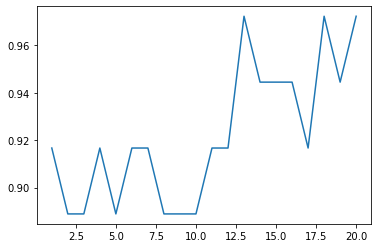

In [59]:
#n_neighbors 갯수별 정확도 시각화

sns.lineplot(x = range(1,21), y = scores)
#선형그래프 활용
plt.show()

*n_neighbors = 13 이후로 더 나은 개선은 보이지 않으므로,
13이 합리적인 하이퍼파라미터로 확인됐습니다.

In [60]:
#remodeling

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(xtr_scaled, ytr)
pred = knn.predict(xt_scaled)
accuracy_score(yt, pred)

0.9722222222222222

*최종 와인 예측 모델의 정확도 약 97%로 성능이 개선된 것을 확인했습니다.